# **Automatidata project**: Build a Multiple Linear Regression Model to predict future taxi fares using existing data

## Project Objective: To predict Taxi Fares 
The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year.

# Build a multiple linear regression model

Multiple linear regression estimates the linear relationship between one continuous dependent variable and two or more independent variables. 

**The purpose** of this project is to demostrate knowledge of Exploratory Data Analysis(EDA) and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

### Task 1. Imports and loading of Libraries
Import the packages that'll be needed for building linear regression models.

In [61]:
# Imports
# Packages for numerics + dataframes
import numpy as np
import pandas as pd

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [62]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

In [63]:
#This line of code ensures all the columns in the dataset are displayed and not redacted by Jupyter Notebook
pd.set_option("display.max_columns", None)

* What are some purposes of EDA before constructing a multiple linear regression model?


1.   To Detect Outliers. Outliers and extreme data values can significantly impact linear regression equations and it's important to detect and either remove rows having outliers or substitute extreme data with average data.

2.   EDA activities also include identifying missing data to help the analyst make decisions on their exclusion or inclusion by substituting values with data set means, medians, and other similar methods. Also depending on how much data is missing in a columns, the columns might just be dropped altogether.

3.   Another reason why we perform EDA is to understand the distribution of the predictor variables as well as check for things like multicollinearity between predictor variables, as well to understand their distributions.

4.  To check for duplicates in the dataset.

5.  To create new variables from existing columns in the dataset.

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

In [64]:
# To get general info about the dataset
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [65]:
# To Know Rows and Columns in the dataset
df0.shape

(22699, 18)

In [66]:
#To check for missing rows in the dataset.
# Check for duplicates
print('Shape of dataframe:', df0.shape)
print('Shape of dataframe with duplicates dropped:', df0.drop_duplicates().shape)

# Check for missing values in dataframe
print('Total count of missing values:', df0.isna().sum().sum())

# Display missing values per column in dataframe
print('Missing values per column:')
df0.isna().sum()

Shape of dataframe: (22699, 18)
Shape of dataframe with duplicates dropped: (22699, 18)
Total count of missing values: 0
Missing values per column:


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [67]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
df0[df0.duplicated()]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount


Use `.describe()`.

In [68]:
#Use .describe() to run general stats about the data like min, max, Q3, Q1, mean
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Task 2b. Convert pickup & dropoff columns to datetime


In [69]:
# Check the format of the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [70]:
# Convert datetime columns to datetime
df0["tpep_pickup_datetime"]= pd.to_datetime(df0["tpep_pickup_datetime"])
df0["tpep_dropoff_datetime"]= pd.to_datetime(df0["tpep_dropoff_datetime"])
# Convert `tpep_pickup_datetime` to datetime format
#df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Convert `tpep_dropoff_datetime` to datetime format
#df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

In [71]:
# Create 'day' col
df0["day_name"]= df0["tpep_pickup_datetime"].dt.day_name()

# Create 'month' col
df0["month_name"]= df0["tpep_pickup_datetime"].dt.month_name()

In [72]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [73]:
# Create `duration` column
df0["duration_minutes"]= (df0["tpep_dropoff_datetime"] - df0["tpep_pickup_datetime"])/np.timedelta64(1,'m')

In [74]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

### Addressing Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [75]:
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration_minutes
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.013777
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,61.996482
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-16.983333
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183333
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383333
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000


In [76]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

#### Not all features will be used in building the model the most important columns to check for outliers are:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

<AxesSubplot:xlabel='duration_minutes'>

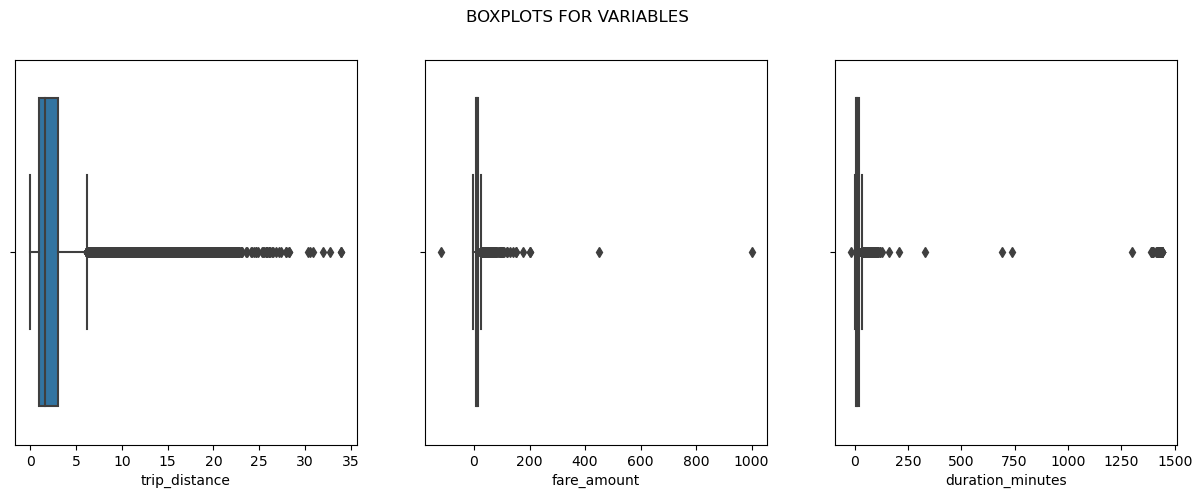

In [77]:
fig,axes= plt.subplots(nrows=1,ncols=3,figsize=(15,5))
fig.suptitle("BOXPLOTS FOR VARIABLES")
sns.boxplot(ax=axes[0], x=df0['trip_distance'])
sns.boxplot(ax=axes[1], x=df0['fare_amount'])
sns.boxplot(ax=axes[2], x=df0['duration_minutes'])

**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

We can see that all the features above have outliers but those of 'fare_amount' 'duration_minutes' seem to be more extreme. We examine in  more details those features.

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [78]:
# Are trip distances of 0 bad data or very short trips rounded down?
sorted(set(df0['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

In [79]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [80]:
sum(df0["trip_distance"]==0)

148

#### `fare_amount` outliers

In [81]:
### YOUR CODE HERE ###
df0["fare_amount"].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

**Question:** What do you notice about the values in the `fare_amount` column?

Impute values less than $0 with `0`.

* In the fare_amount we can see that the lowest amount is -$120 which is an abnormal value for fare_amount. The maximum fare amount is approx. $1000 which is unrealistic.Use the formula Q3+(k + IQR) to calculate the threshold beyond which we'll consider outliers substituting K=6.

In [82]:
# Impute values less than $0 with 0
df0.loc[df0["fare_amount"] < 0, "fare_amount"]=0
df0["fare_amount"].describe()

count    22699.000000
mean        13.033832
std         13.212462
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [83]:
def outlier(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
  
    for col in column_list:
        
         # Reassign minimum to zero
        df0.loc[df0[col] < 0, col]=0
        # Calculate upper threshold
        q1= df0[col].quantile(0.25)
        q3= df0[col].quantile(0.75)
        iqr= q3-q1
       # lower_threshold= q1 - (iqr_factor*iqr)
        upper_threshold= q3 + (iqr_factor*iqr)
        print(col)
        print("q1:",q1)
        print("q3:",q3)
        print("iqr:",iqr)
       # print("lower_threshold:",lower_threshold)
        print("upper_threshold:",upper_threshold)
        

        # Reassign values > threshold to threshold
        df0.loc[df0[col] > upper_threshold, col] = upper_threshold
        print(df0[col].describe())
        print()
      

In [84]:
outlier(["fare_amount"],6)

fare_amount
q1: 6.5
q3: 14.5
iqr: 8.0
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



#### `duration` outliers


In [85]:
# Call .describe() for duration outliers
df0["duration_minutes"].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration_minutes, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [86]:
# Impute a 0 for any negative values
df0.loc[df0["duration_minutes"] < 0, "duration_minutes"]=0

In [87]:
# Impute the high outliers
outlier(["duration_minutes"],6)

duration_minutes
q1: 6.65
q3: 18.383333333333333
iqr: 11.733333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration_minutes, dtype: float64



In [88]:
df0

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,day_name,month_name,duration_minutes
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,Saturday,March,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,Tuesday,April,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,Friday,December,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,Sunday,May,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,Saturday,April,16.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,Friday,February,3.266667
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,Sunday,August,40.800000
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,Monday,September,4.133333
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,Saturday,July,11.933333


### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [89]:
# Create `pickup_dropoff` column
df0["pickup_dropoff"]= df0["PULocationID"].astype("str") + ' ' + df0["DOLocationID"].astype("str")
df0["pickup_dropoff"].head()

0    100 231
1     186 43
2    262 236
3     188 97
4      4 112
Name: pickup_dropoff, dtype: object

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [90]:
grouped= df0.groupby(["pickup_dropoff"])["trip_distance"].mean()
grouped

pickup_dropoff
1 1         2.433333
10 148     15.700000
100 1      16.890000
100 100     0.253333
100 107     1.180000
             ...    
97 65       0.500000
97 66       1.400000
97 80       3.840000
97 90       4.420000
97 97       1.006667
Name: trip_distance, Length: 4172, dtype: float64

`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [91]:
# 1. Convert `grouped` to a dictionary
grouped_dict= grouped.to_dict()


# 2. Reassign to only contain the inner dictionary
#grouped_dict = grouped_dict['trip_distance']
grouped_dict

{'1 1': 2.433333333333333,
 '10 148': 15.7,
 '100 1': 16.89,
 '100 100': 0.25333333333333335,
 '100 107': 1.18,
 '100 113': 2.024,
 '100 114': 1.94,
 '100 12': 4.55,
 '100 125': 2.84,
 '100 13': 4.201666666666667,
 '100 132': 17.2175,
 '100 137': 1.299,
 '100 138': 10.432857142857143,
 '100 140': 2.746,
 '100 141': 2.11,
 '100 142': 1.6958333333333335,
 '100 143': 1.5825,
 '100 144': 3.0066666666666664,
 '100 148': 4.1066666666666665,
 '100 151': 3.668,
 '100 152': 4.9,
 '100 158': 1.938,
 '100 161': 0.9813888888888889,
 '100 162': 1.2163636363636363,
 '100 163': 1.2656,
 '100 164': 0.841,
 '100 166': 5.199999999999999,
 '100 170': 0.8548,
 '100 177': 12.0,
 '100 181': 9.34,
 '100 186': 0.6404761904761904,
 '100 193': 4.39,
 '100 198': 9.01,
 '100 202': 5.3,
 '100 209': 4.43,
 '100 211': 2.48,
 '100 224': 1.9500000000000002,
 '100 225': 7.5,
 '100 229': 1.7850000000000001,
 '100 230': 0.72975,
 '100 231': 3.5216666666666665,
 '100 232': 3.8449999999999998,
 '100 233': 1.245833333333333

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [92]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df0["mean_distance"]= df0["pickup_dropoff"]

# 2. Map `grouped_dict` to the `mean_distance` column
df0["mean_distance"]= df0["mean_distance"].map(grouped_dict)

# Confirm that it worked
df0

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,day_name,month_name,duration_minutes,pickup_dropoff,mean_distance
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,Saturday,March,14.066667,100 231,3.521667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,Tuesday,April,26.500000,186 43,3.108889
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,Friday,December,7.200000,262 236,0.881429
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,Sunday,May,30.250000,188 97,3.700000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,Saturday,April,16.716667,4 112,4.435000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,Friday,February,3.266667,48 186,1.098214
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,Sunday,August,40.800000,132 164,18.757500
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,Monday,September,4.133333,107 234,0.684242
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,Saturday,July,11.933333,68 144,2.077500


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [93]:
grouped= df0.groupby(["pickup_dropoff"])[["duration_minutes"]].mean()

grouped= grouped.to_dict()

grouped= grouped["duration_minutes"]

grouped

df0["mean_duration_minutes"]= df0["pickup_dropoff"]

df0["mean_duration_minutes"]= df0["mean_duration_minutes"].map(grouped)

df0

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
### YOUR CODE HERE ###

# Confirm that it worked
### YOUR CODE HERE ###

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,day_name,month_name,duration_minutes,pickup_dropoff,mean_distance,mean_duration_minutes
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,Saturday,March,14.066667,100 231,3.521667,22.847222
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,Tuesday,April,26.500000,186 43,3.108889,24.470370
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,Friday,December,7.200000,262 236,0.881429,7.250000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,Sunday,May,30.250000,188 97,3.700000,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,Saturday,April,16.716667,4 112,4.435000,14.616667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,Friday,February,3.266667,48 186,1.098214,8.594643
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,Sunday,August,40.800000,132 164,18.757500,59.560417
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,Monday,September,4.133333,107 234,0.684242,6.609091
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,Saturday,July,11.933333,68 144,2.077500,16.650000


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [94]:
# Create 'day' col
df0["day_name"]= df0["tpep_pickup_datetime"].dt.day_name()

# Create 'month' col
df0["month_name"]= df0["tpep_pickup_datetime"].dt.month_name()

In [95]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,day_name,month_name,duration_minutes,pickup_dropoff,mean_distance,mean_duration_minutes
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,Saturday,March,14.066667,100 231,3.521667,22.847222
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,Tuesday,April,26.500000,186 43,3.108889,24.470370
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,Friday,December,7.200000,262 236,0.881429,7.250000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,Sunday,May,30.250000,188 97,3.700000,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,Saturday,April,16.716667,4 112,4.435000,14.616667


In [96]:
df0.dtypes

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
day_name                         object
month_name                       object
duration_minutes                float64
pickup_dropoff                   object
mean_distance                   float64
mean_duration_minutes           float64
dtype: object

#### Create a `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [97]:
# Create 'rush_hour' col
df0['rush_hour']= df0["tpep_pickup_datetime"].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df0.loc[df0["day_name"].isin(["Saturday","Sunday"]),'rush_hour']=0
df0

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,day_name,month_name,duration_minutes,pickup_dropoff,mean_distance,mean_duration_minutes,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,Saturday,March,14.066667,100 231,3.521667,22.847222,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,Tuesday,April,26.500000,186 43,3.108889,24.470370,14
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,Friday,December,7.200000,262 236,0.881429,7.250000,7
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,Sunday,May,30.250000,188 97,3.700000,30.250000,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,Saturday,April,16.716667,4 112,4.435000,14.616667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,Friday,February,3.266667,48 186,1.098214,8.594643,17
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,Sunday,August,40.800000,132 164,18.757500,59.560417,0
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,Monday,September,4.133333,107 234,0.684242,6.609091,14
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,Saturday,July,11.933333,68 144,2.077500,16.650000,0


In [98]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] <= 10:
        val= 1
    elif 16 <= hour['rush_hour'] <= 20:
        val= 1
    else:
        val= 0
    return val

In [99]:
# Apply the `rush_hourizer()` function to the new column
df0.loc[(df0.day_name != 'Saturday') & (df0.day_name != 'Sunday'), 'rush_hour'] = df0.apply(rush_hourizer,axis=1)

In [100]:
df0

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,day_name,month_name,duration_minutes,pickup_dropoff,mean_distance,mean_duration_minutes,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,Saturday,March,14.066667,100 231,3.521667,22.847222,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,Tuesday,April,26.500000,186 43,3.108889,24.470370,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,Friday,December,7.200000,262 236,0.881429,7.250000,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,Sunday,May,30.250000,188 97,3.700000,30.250000,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,Saturday,April,16.716667,4 112,4.435000,14.616667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,Friday,February,3.266667,48 186,1.098214,8.594643,1
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,Sunday,August,40.800000,132 164,18.757500,59.560417,0
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,Monday,September,4.133333,107 234,0.684242,6.609091,0
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,Saturday,July,11.933333,68 144,2.077500,16.650000,0


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

In [46]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,day_name,month_name,duration_minutes,pickup_dropoff,mean_distance,mean_duration_minutes,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,Saturday,March,14.066667,100 231,3.521667,22.847222,1
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,Tuesday,April,26.500000,186 43,3.108889,24.470370,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,Friday,December,7.200000,262 236,0.881429,7.250000,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,Sunday,May,30.250000,188 97,3.700000,30.250000,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,Saturday,April,16.716667,4 112,4.435000,14.616667,0


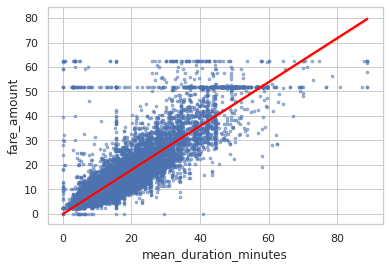

In [47]:
# Create a scatterplot to visualize the relationship between variables of interest
sns.set(style="whitegrid")
sns.regplot(x=df0['mean_duration_minutes'],y=df0['fare_amount'],line_kws={'color':'red'},scatter_kws={'alpha':0.5, 's':7})

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [48]:
df0[df0["fare_amount"]>50]["fare_amount"].value_counts()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
51.0      7
60.0      6
55.0      6
51.5      6
53.0      4
52.5      4
61.0      3
62.0      3
55.5      3
56.0      3
56.5      3
58.5      2
59.5      2
61.5      2
57.0      2
54.0      2
58.0      1
54.7      1
54.5      1
Name: fare_amount, dtype: int64

There are 514 trips whose values were $52

Examine the first 30 of these trips.

In [101]:
# Set pandas to display all columns
df0[df0["fare_amount"]==52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,day_name,month_name,duration_minutes,pickup_dropoff,mean_distance,mean_duration_minutes,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,Sunday,March,36.800000,236 132,19.211667,40.500000,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,Saturday,June,66.850000,132 163,19.229000,52.941667,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,Saturday,November,0.966667,132 132,2.255862,3.021839,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,Wednesday,December,29.183333,132 79,19.431667,47.275000,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,Sunday,September,29.483333,132 234,17.654000,49.833333,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,Tuesday,February,39.833333,132 48,18.761905,58.246032,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,Monday,June,15.616667,228 88,4.730000,15.616667,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,Thursday,August,45.450000,132 48,18.761905,58.246032,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,Tuesday,September,42.850000,186 132,17.096000,42.920000,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,Sunday,April,71.583333,132 148,17.994286,46.340476,0


**Question:** What do you notice about the first 30 trips?

==> ENTER YOUR RESPONSE HERE

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [106]:
df0.dtypes

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
day_name                         object
month_name                       object
duration_minutes                float64
pickup_dropoff                   object
mean_distance                   float64
mean_duration_minutes           float64
rush_hour                         int64


In [107]:
df0_model= df0[["VendorID","passenger_count","fare_amount","mean_distance","mean_duration_minutes","rush_hour"]]

### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`. 

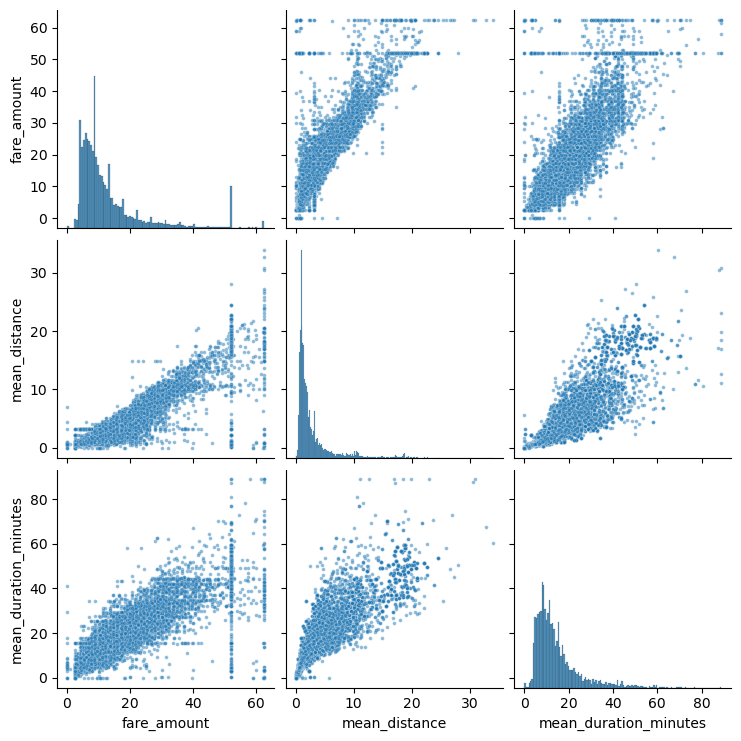

In [108]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df0_model[["fare_amount","mean_distance","mean_duration_minutes"]],plot_kws={'alpha':0.5, 's':7} )

These variables all show linear correlation with each other.

### Task 7. Identify correlations

 A correlation matrix is created to help determine most correlated variables.

In [109]:
# Correlation matrix to help determine most correlated variables
df0_model.corr(method="pearson")

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration_minutes,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.000752
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.024283
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.025901
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.046794
mean_duration_minutes,0.001876,0.015852,0.859105,0.874864,1.000000,-0.027499
rush_hour,-0.000752,-0.024283,-0.025901,-0.046794,-0.027499,1.000000


A correlation heatmap of the data.

<AxesSubplot:title={'center':'Heatmap_Showing_Correlation_Between_Variables'}>

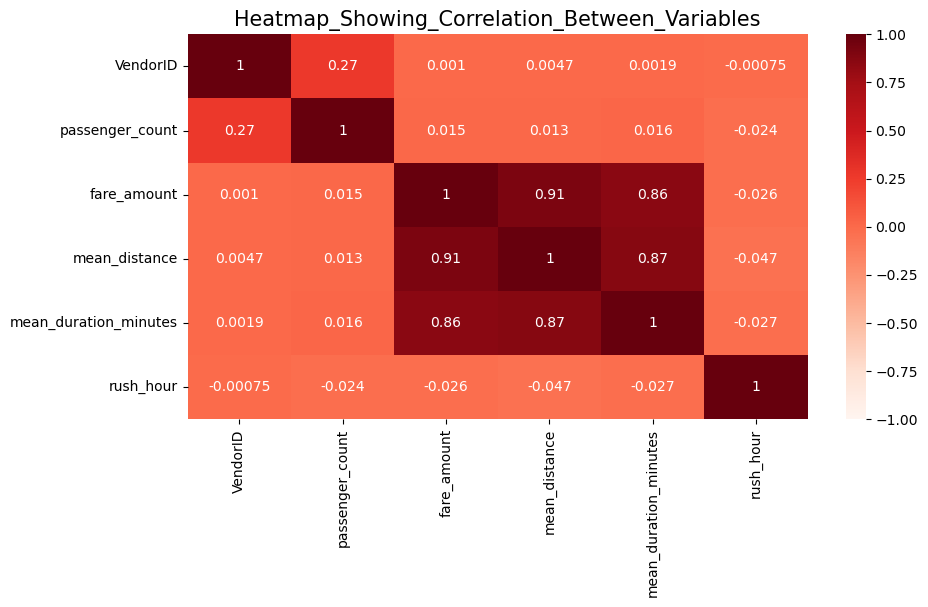

In [110]:
# Create correlation heatmap
plt.figure(figsize=(10,5))
plt.title("Heatmap_Showing_Correlation_Between_Variables",fontsize=15)
sns.heatmap(df0_model.corr(method="pearson"), cmap="Reds", vmin=-1, vmax=1, annot=True)

### Task 8a. Split data into outcome variable and features

Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [111]:
# Remove the target column from the features
# X = df2.drop(columns='fare_amount')
### YOUR CODE HERE ###
X= df0_model.drop(["fare_amount"], axis=1)

# Set y variable
y= df0_model[["fare_amount"]]

# Display first few rows
### YOUR CODE HERE ###


In [112]:
X.dtypes

VendorID                   int64
passenger_count            int64
mean_distance            float64
mean_duration_minutes    float64
rush_hour                  int64
dtype: object

### Task 8b. Pre-process data


Dummy encode categorical variables

In [113]:
# Convert VendorID to string
X["VendorID"]= X["VendorID"].astype(str)

# Get dummies
X= pd.get_dummies(X, drop_first=True)

### Split data into training and test sets

In [114]:
# Create training and testing sets
#help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [115]:
# Standardize the X variables
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
print("X_train_scaled:",X_train_scaled)

X_train_scaled: [[-0.50301524  0.8694684   0.17616665 -0.77153979  0.89286563]
 [-0.50301524 -0.60011281 -0.69829589  1.29610943  0.89286563]
 [ 0.27331093 -0.47829156 -0.57301906 -0.77153979 -1.11998936]
 ...
 [-0.50301524 -0.45121122 -0.6788917  -0.77153979 -1.11998936]
 [-0.50301524 -0.58944763 -0.85743597  1.29610943 -1.11998936]
 [ 1.82596329  0.83673851  1.13212101 -0.77153979  0.89286563]]


### Fit the model

Instantiate your model and fit it to the training data.

In [116]:
# Fit your model to the training data
linearregression= LinearRegression()
linearregression.fit(X_train_scaled,y_train)

LinearRegression()

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [117]:
# Evaluate the model performance on the training data
y_pred_train= linearregression.predict(X_train_scaled)
print("R^2:", r2_score(y_train, y_pred_train))
print("MAE:", mean_absolute_error(y_train, y_pred_train))
print("MSE:", mean_squared_error(y_train, y_pred_train))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))

R^2: 0.839866631223281
MAE: 2.1862385655328853
MSE: 17.887144535024103
RMSE: 4.229319630274366


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [118]:
# Scale the X_test data
X_test_scaled= scaler.transform(X_test)
X_test_scaled

array([[-0.50301524, -0.01228033, -0.1109662 , -0.77153979,  0.89286563],
       [-0.50301524,  0.1705781 ,  0.83266676,  1.29610943,  0.89286563],
       [ 0.27331093, -0.56800902, -0.71163492, -0.77153979,  0.89286563],
       ...,
       [-0.50301524, -0.5294519 , -0.64990563, -0.77153979,  0.89286563],
       [-0.50301524, -0.53660633, -0.83261981, -0.77153979, -1.11998936],
       [-0.50301524, -0.29519336, -0.17972406,  1.29610943,  0.89286563]])

In [119]:
# Evaluate the model performance on the testing data
y_test_pred= linearregression.predict(X_test_scaled)
print("R^2:", r2_score(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

R^2: 0.8682469790456722
MAE: 2.1336582291943404
MSE: 14.327692251527612
RMSE: 3.7851938195457855


In [120]:
y_test_pred.ravel()

array([12.33376318, 16.5428993 ,  6.70387666, ...,  7.12807931,
        6.67323594, 10.37284642])

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [121]:
# Create a `results` dataframe
results= pd.DataFrame(data={"Actual":y_test["fare_amount"],"Predicted":y_test_pred.ravel()})

#results["residual"]= y_test["fare_amount"] - y_test_pred.ravel()

results["Residuals"]= results["Actual"] - results["Predicted"]

results

,Actual,Predicted,Residuals
5818,14.0,12.333763,1.666237
18134,28.0,16.542899,11.457101
4655,5.5,6.703877,-1.203877
7378,15.5,16.205251,-0.705251
13914,9.5,10.514265,-1.014265
...,...,...,...
11108,21.5,20.670330,0.829670
7840,5.5,5.912060,-0.412060
8,9.0,7.128079,1.871921
16996,7.0,6.673236,0.326764


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

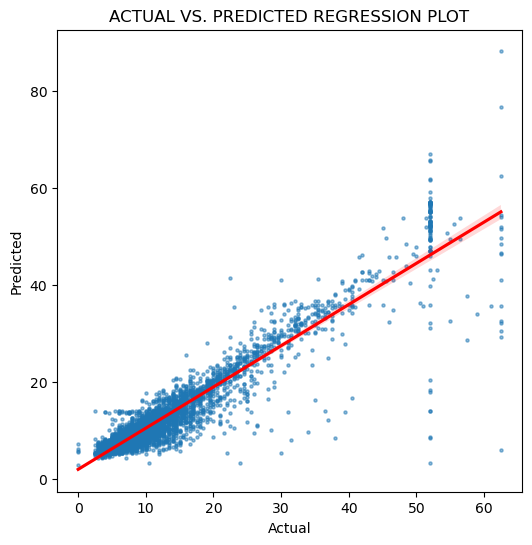

In [122]:
# Create a scatterplot to visualize `predicted` over `actual`
plt.figure(figsize=(6,6))
sns.regplot(y=results["Predicted"], x=results["Actual"], scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
#plt.xlim(0,60)
#plt.ylim(0,60)
plt.title("ACTUAL VS. PREDICTED REGRESSION PLOT")
plt.show()

Visualize the distribution of the `residuals` using a histogram.

Residual mean is: -0.015181994717796873


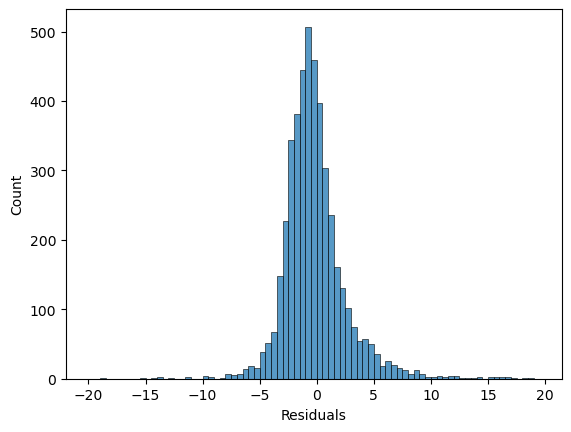

In [123]:
# Visualize the distribution of the `residuals`
#plt.figure(figsize=(6,8))
sns.histplot(results["Residuals"], bins= np.arange(-20,20,0.5))
print("Residual mean is:", results["Residuals"].mean())
#plt.show()



In [124]:
import statsmodels.api as sm

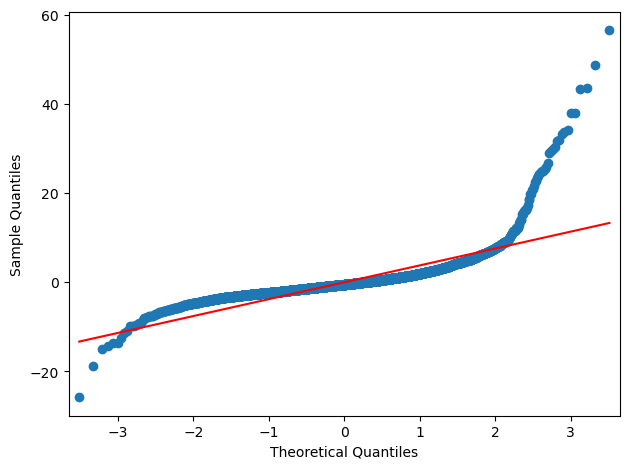

In [125]:
sm.qqplot(results["Residuals"],line="s")
plt.tight_layout()

Create a scatterplot of `residuals` over `predicted`.

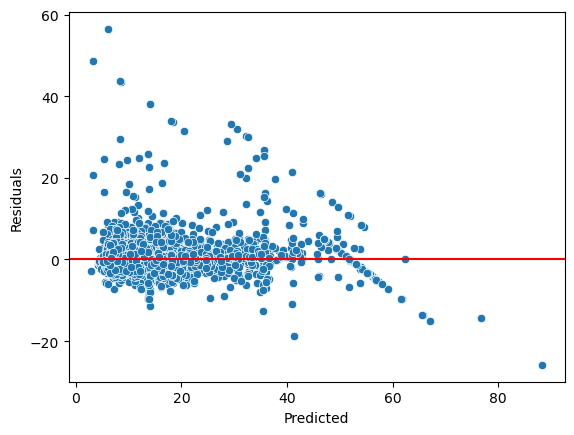

In [126]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x=results["Predicted"], y=results["Residuals"])
plt.axhline(0,color='red')

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [127]:
# Output the model's coefficients
coefficients= pd.DataFrame(linearregression.coef_,columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration_minutes,rush_hour,VendorID_2
0,0.031544,7.135758,2.811583,0.121491,-0.054611


In [133]:
# 1. Calculate SD of `mean_distance` in X_train data
print(X_train['mean_distance'].std())

# 2. Divide the model coefficient by the standard deviation
print(7.133867 / X_train['mean_distance'].std())

3.574812975256415
1.9955916713344426


What do these coefficients mean? How should they be interpreted?

From the above, the variable with the highest influence on the fare_amount is the mean_distance. Hence we can say that for every 3.57 miles travelled, there is an increase in fare_amount by $7.13.

### Predict on full dataset

In [130]:
X_scaled= scaler.transform(X)
y_preds_full= linearregression.predict(X_scaled)

In [131]:
print('R^2:', r2_score(y, y_preds_full))
print('MAE:', mean_absolute_error(y, y_preds_full))
print('MSE:', mean_squared_error(y, y_preds_full))
print('RMSE:',np.sqrt(mean_squared_error(y, y_preds_full)))

R^2: 0.8454223957926787
MAE: 2.175722034981892
MSE: 17.17522271613014
RMSE: 4.144300027282067


## Thank You For Reading My Notebook.